In [39]:
import pandas as pd
import numpy as np

In [40]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [41]:
df1.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Handling of Missing Data
#### It's important to see which data entries are missing in the given dataset, analyze how they effect the model, and handling these missing data points. 

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## As we can see, there are 171 data points missing in Age, 687 data points missing in Cabin and 2 data points missing in Embarked.

In [43]:
test_train = pd.concat([df1,df2],sort=False,axis=0)

In [44]:
import matplotlib.pyplot as plt

In [45]:
missing_values = dict(test_train.isnull().sum())

In [46]:
X_missing = [keys for keys in missing_values.keys()]

In [47]:
Y_missing = [values for values in missing_values.values()]

Text(0.5, 1.0, 'Visualization of number of missing values')

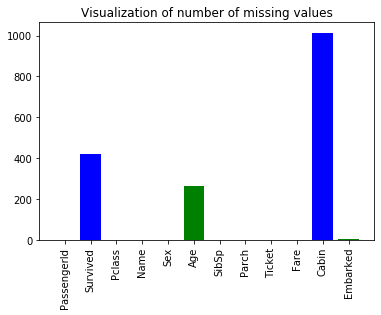

In [48]:
plt.bar(X_missing,Y_missing,color='rbg')
plt.xticks(rotation=90)
plt.title('Visualization of number of missing values')

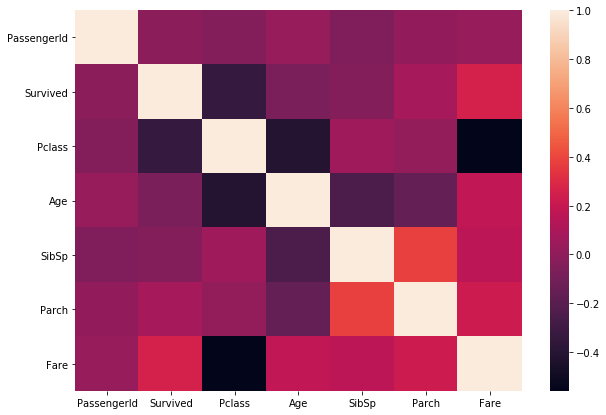

In [49]:
import seaborn as sns
torr = test_train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(torr)

### Let's have a complete analysis of who survived in the wreckage and draw out some conclusions

In [50]:
test_train.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [51]:
survived = 342
died = 549
(test_train[test_train['Survived']==1].SibSp!=0).sum()/342
#Almost 39% of people who survived had a sibling or their spouse with them on the ship

0.38596491228070173

In [52]:
(test_train[test_train['Survived'] ==0].SibSp==0).sum()/549
#Almost 72.5% of people who died did not have their spouse or sibling with them on the ship

0.7249544626593807

In [53]:
(test_train[test_train['Survived'] ==0].Parch==0).sum()/549
#Almost 81% of people who died did not have their parent or children on the ship

0.8105646630236795

In [54]:
(test_train[test_train['Survived'] ==1].Parch!=0).sum()/342
#Almost 32% of people who survived had their childern or parent on the ship

0.31871345029239767

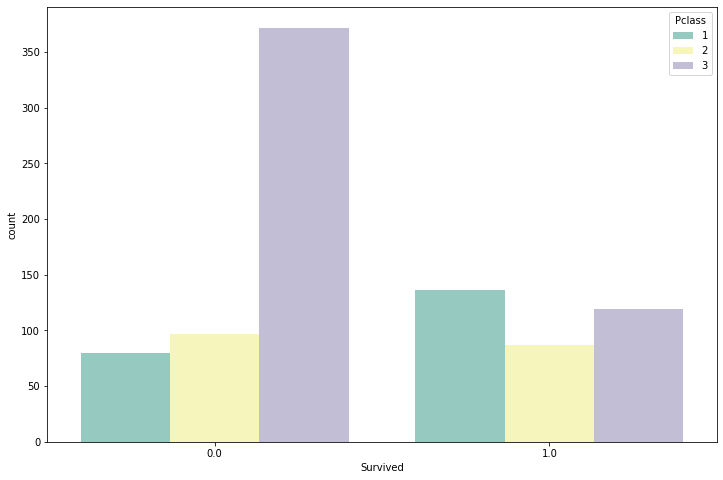

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x=test_train.Survived, hue=test_train.Pclass, palette='Set3')
#Majority who died were from Class3

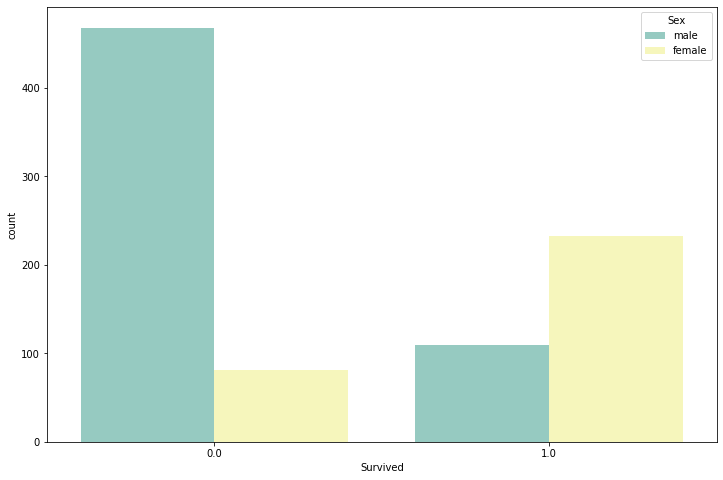

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x=test_train.Survived, hue=test_train.Sex, palette='Set3')
#Majority deaths were that of Males

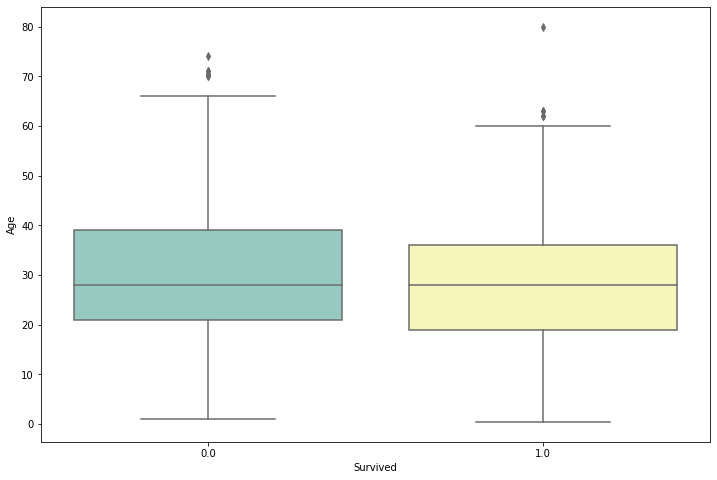

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x=test_train.Survived, y = test_train.Age, palette='Set3')
#There isn't a particular difference between age of people dying and those who survived

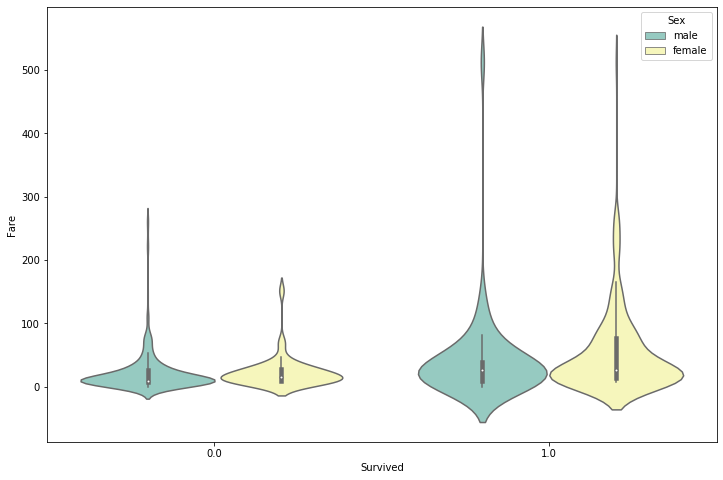

In [58]:
plt.figure(figsize=(12,8))
sns.violinplot(x=test_train.Survived, y = test_train.Fare, palette='Set3', hue=test_train.Sex)
#It can be clearly seen that those dying had less fair compared to those who survived (A hint towards Social Status? Maybe yes)
#Same observation was visible in the Survived vs Pclass graph
#The fact that in the given Violin Plot, there is a highest probability for the deceased to have a fare of '0' indicates that maximum workers could not survive the wreckage.

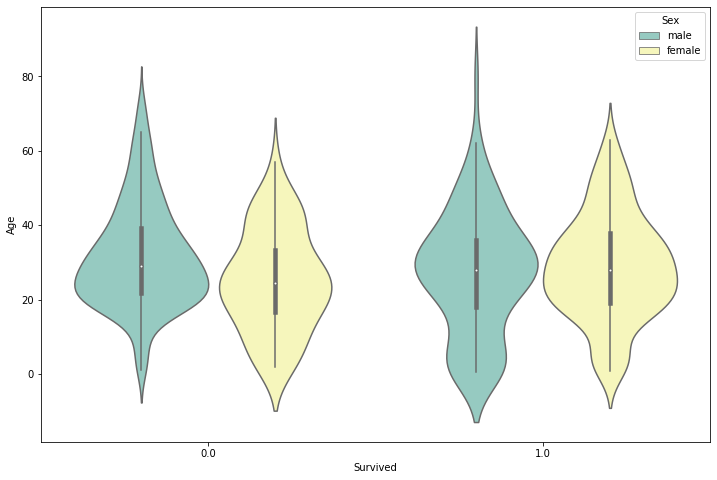

In [59]:
plt.figure(figsize=(12,8))
sns.violinplot(x=test_train.Survived, y = test_train.Age, palette='Set3', hue=test_train.Sex)
#It's observable that children had a higher probability to survive.

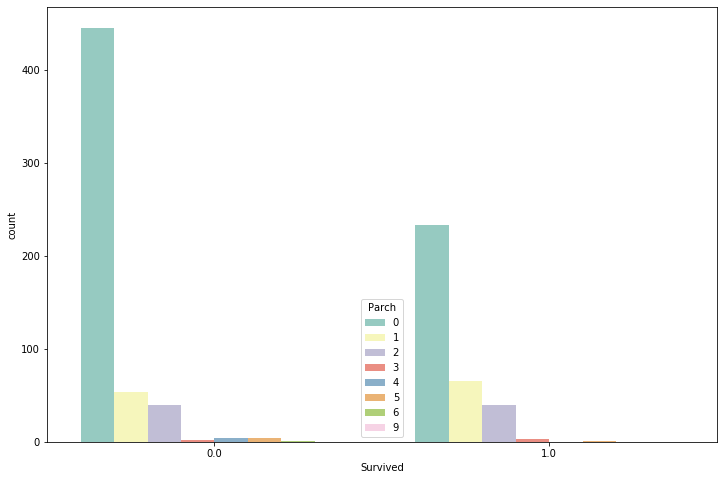

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x=test_train.Survived, hue=test_train.Parch, palette='Set3')

In [61]:
test_train['TotalFamily'] = test_train['SibSp'] + test_train['Parch']

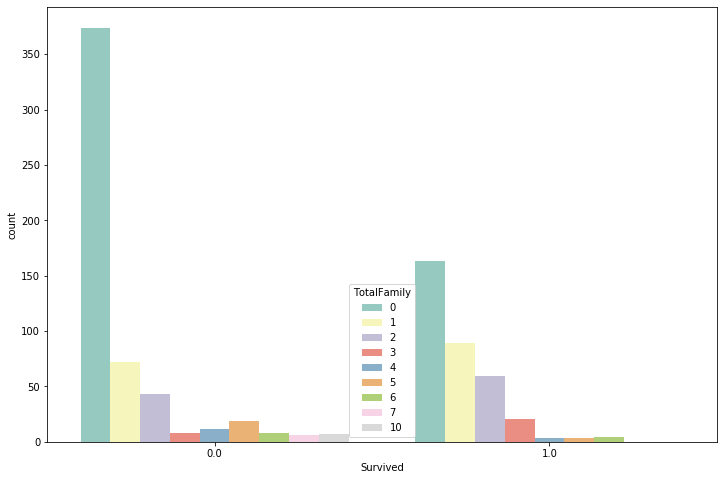

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x=test_train.Survived, hue=test_train.TotalFamily, palette='Set3')
#CLearly people with 1 to 3 family members on board had a higher survival rate compared to those with NIL or more than 3 family members.

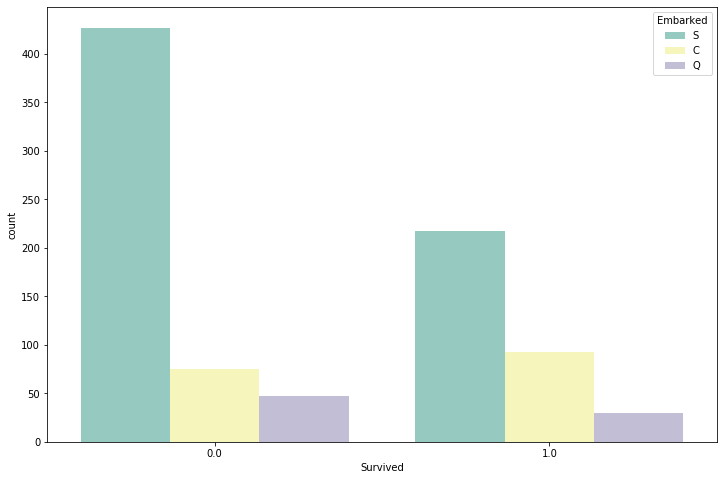

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x=test_train.Survived, hue=test_train.Embarked, palette='Set3')

## It's pretty clear from above visualizations that 
### 1. Passengers who had a 1st Class ticket had a higher survival rate
### 2. Passengers who had 1 to 3 family members on board had a higher survival rate
### 3. Children and Women had a higher survival rate

### Now let's analyze the columns which have a missing values in order to fill them

In [64]:
test_train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
TotalFamily       0
dtype: int64

### Age

In [65]:
test_train.Age = test_train.Age.fillna(test_train.Age.median())

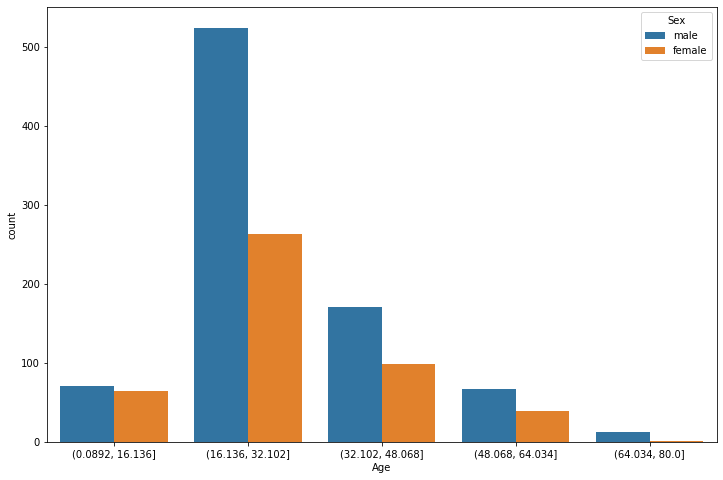

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x = pd.cut(test_train.Age, bins=5, include_lowest=True, retbins=True)[0], hue=test_train.Sex, palette='tab10')
#Maximum passengers onboard are from age of [16,33]

In [67]:
a = pd.cut(test_train.Age, bins=5, include_lowest=True, retbins=True,labels=[0,1,2,3,4])[0]
#Here we categorize ages into five different categories

In [68]:
test_train['Category_Age'] = a

In [69]:
test_train.drop('Age',axis=1,inplace=True)

In [70]:
test_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,Category_Age
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1,2
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,0,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,2
416,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,0,1


### Cabin

In [71]:
df1.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
C82            1
A6             1
A14            1
E50            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [72]:
def get_first(arr,position):
    return arr[position][0]

In [73]:
test_train.loc[test_train.Cabin.isnull(), 'Cabin']='N'

In [74]:
test_train['Cabin'] = test_train.Cabin.str.split(' ').apply(get_first,position=0)

In [75]:
test_train['Cabin']=test_train['Cabin'].map({"N":0, "C":1, "B":2, "D":3, "E":4, "A":5, "F":6, "G":7, "T":8})

### Embarked

In [76]:
test_train.loc[test_train['Embarked'].isnull(),'Embarked'] = "S"
#Since Maximum passengers boarded from Southampton i.e S, it's only fair to give the same value to the mere 2 missing values

### While handling missing values we have taken a look at the Age variable which was a continous, however, we need to take care of yet another continous variable i.e Fare 

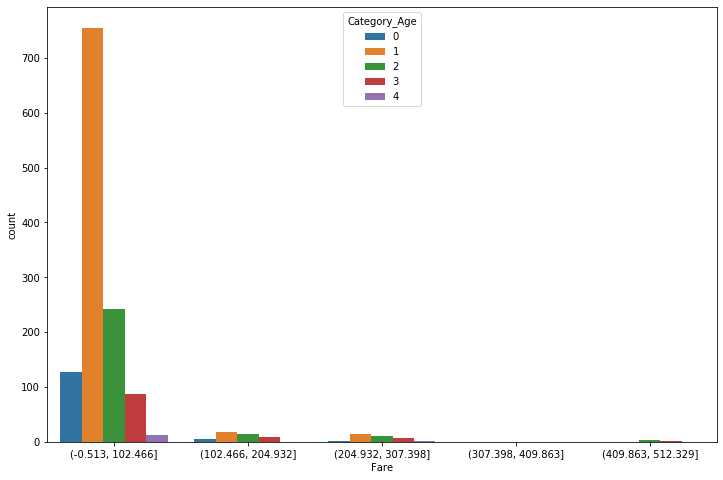

In [77]:
plt.figure(figsize=(12,8))
sns.countplot(x = pd.cut(test_train.Fare, bins=5, include_lowest=True, retbins=True)[0], hue=test_train.Category_Age, palette='tab10')

In [78]:
a = pd.cut(test_train.Fare, bins=5, include_lowest=True, retbins=True,labels=[0,1,2,3,4])[0]

In [79]:
test_train['Category_Fare'] = a

In [80]:
test_train.loc[test_train['Category_Fare'].isnull(),'Category_Fare'] = 0
#Most of the passengers in Category_Age 3 belong to Category_Fare 0, hence it's valid to assign the missing value 0

In [81]:
test_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,Category_Age,Category_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,S,1,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1,C,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,S,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1,S,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,S,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,0,S,0,1,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,1,C,0,2,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,2,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,0,S,0,1,0


In [82]:
test_train.drop(['Name','Fare','Cabin','Ticket'],axis=1,inplace=True)
#The Name and Ticket No. of Passenger is very unlikely to have an effect on their survival, even if the ticket No denotes boarding point or the passenger class, these informations have been covered through other Variables. It's quite logical to drop these variables from our dataset

In [83]:
test_train['Embarked'] = test_train.Embarked.map({'S':0,'C':1,'Q':2})
#Categorizin the Embarked Variable

In [84]:
test_train['Sex'] = test_train.Sex.map({'male':0,'female':1})
#Categorizing the Sex variable

In [175]:
training = test_train[:891]
X_train = training.iloc[:,2:]
Y_train = training.iloc[:,1]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_tr_tr,X_tr_te,Y_tr_tr,Y_tr_te = train_test_split(X_train,Y_train)
#I have splitted the training data in order to see how different algorithms work on the data inorder to choose the best algorithm for the original testing data

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Using Different Classification Algorithms to obtain results on train_test split on training data

#### 1. Logistic Regression

In [89]:
clf1 = LogisticRegression(solver='lbfgs',C=1,penalty='l2',max_iter=1000)
clf1.fit(X_tr_tr,Y_tr_tr)
y_pred1 = clf1.predict(X_tr_te)

In [90]:
clf1.score(X_tr_te,Y_tr_te)

0.7937219730941704

##### We get a score of 76.7% through Logistic Regression

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [92]:
print("Confusion Matrix")
print(confusion_matrix(y_pred1,Y_tr_te))
print("Classification Report")
print(classification_report(y_pred1,Y_tr_te))

Confusion Matrix
[[113  15]
 [ 31  64]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       128
         1.0       0.81      0.67      0.74        95

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223



#### 2. Decision Tree Classifier

In [93]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_tr_tr,Y_tr_tr)
y_pred2 = clf2.predict(X_tr_te)

In [94]:
clf2.score(X_tr_te,Y_tr_te)

0.7982062780269058

In [95]:
print("Confusion Matrix")
print(confusion_matrix(y_pred2,Y_tr_te))
print("Classification Report")
print(classification_report(y_pred2,Y_tr_te))

Confusion Matrix
[[122  23]
 [ 22  56]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       145
         1.0       0.71      0.72      0.71        78

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



##### We get a score of 77.1% through Decision Tree Classifier

#### 3. Random Forest Classifier

In [96]:
clf3 = RandomForestClassifier()
clf3.fit(X_tr_tr,Y_tr_tr)
y_pred3 = clf3.predict(X_tr_te)

In [97]:
clf3.score(X_tr_te,Y_tr_te)

0.7937219730941704

In [98]:
print("Confusion Matrix")
print(confusion_matrix(y_pred3,Y_tr_te))
print("Classification Report")
print(classification_report(y_pred3,Y_tr_te))

Confusion Matrix
[[118  20]
 [ 26  59]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       138
         1.0       0.75      0.69      0.72        85

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



##### We get the same score as in Decision Tree Classifier, however, we were able to improve on the score of prediciton of 1.0 i.e Survival

#### 4. SVM Classifiers

In [99]:
from sklearn.model_selection import GridSearchCV
clf4 = SVC()
grid = {'C':[1e0,1e1,5e1,1e2,5e2,1e3],'gamma':[1e-1,5e-1,1e-2,5e-2,1e-3,5e-3]}
abc = GridSearchCV(clf4,grid)
#I am using Grid Search to get the best possible parameters for the SVM classifier

In [100]:
abc.fit(X_tr_tr,Y_tr_tr)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
                         'gamma': [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
abc.best_estimator_
#For the best results --> C=100.0 and Gamma = 0.05

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
y_pred4 = abc.predict(X_tr_te)

In [103]:
abc.score(X_tr_te,Y_tr_te)

0.8161434977578476

In [104]:
print("Confusion Matrix")
print(confusion_matrix(y_pred4,Y_tr_te))
print("Classification Report")
print(classification_report(y_pred4,Y_tr_te))

Confusion Matrix
[[119  16]
 [ 25  63]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       135
         1.0       0.80      0.72      0.75        88

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.81       223



##### We get a score of 77.6% through SVM Classifiers

#### 5. K Nearest Neighbor Classifier

In [105]:
clf5 = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
x_axis = []
scores = []

In [106]:
for k in range(1,50,2):
    x_axis.append(k)
    clf_temp = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf_temp,X_tr_tr,Y_tr_tr,cv=10,scoring='accuracy')
    scores.append(score.mean())
    print(k,score.mean())

1 0.6707598371777477
3 0.7604703753957486
5 0.7664179104477612
7 0.7753279059249208
9 0.7814337403889643
11 0.7949570330167345
13 0.7949344188150159
15 0.7888964269561285
17 0.7888738127544098
19 0.7919267299864315
21 0.7949570330167346
23 0.7814563545906831
25 0.7799412030755314
27 0.7799638172772502
29 0.7844188150158299
31 0.7799185888738128
33 0.7829715061058344
35 0.7829262777023971
37 0.7739484396200814
39 0.7739484396200814
41 0.7709859791949344
43 0.7620081411126187
45 0.7575757575757576
47 0.7650384441429218
49 0.7695160560832204


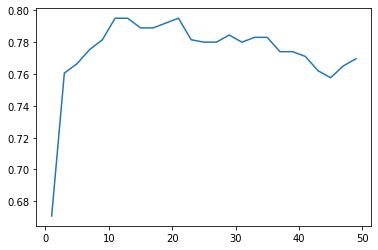

In [107]:
plt.plot(x_axis,scores)

In [108]:
x_axis = np.array(x_axis)
scores = np.array(scores)
x_axis[np.argmax(scores)]

21

##### We get a maximum accuracy on choosing 13 as the value of n_neighbors in KNN classifer

In [109]:
clf5 = KNeighborsClassifier(n_neighbors=13)
clf5.fit(X_tr_tr,Y_tr_tr)
y_pred5 = clf5.predict(X_tr_te)

In [110]:
clf5.score(X_tr_te,Y_tr_te)

0.7757847533632287

In [111]:
print("Confusion Matrix")
print(confusion_matrix(y_pred5,Y_tr_te))
print("Classification Report")
print(classification_report(y_pred5,Y_tr_te))

Confusion Matrix
[[113  19]
 [ 31  60]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       132
         1.0       0.76      0.66      0.71        91

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



##### We get a accuracy of 77.1% using KNeighborsClassifier

#### We get the best accuracy using SVM Classifier, hence it seems like the best option to use the SVM Classifier with the obtained parameters to get the results on final dataset

In [112]:
clf = SVC(C=100.0,gamma=0.05)
clf.fit(X_train,Y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [176]:
test = test_train[891:]

In [177]:
X_test = test.iloc[:,2:]

In [116]:
y_pred = clf.predict(X_test)

In [117]:
np.savetxt('MiskaaTitanic_Datasetpredictions.csv',y_pred,delimiter=',')

In [118]:
import tensorflow as tf

In [124]:
from sklearn.preprocessing import StandardScaler

In [178]:
sc = StandardScaler() 

In [179]:
X_train = sc.fit_transform(X_train)

In [180]:
X_test = sc.transform(X_test)

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [133]:
X_train.shape

(891, 8)

In [181]:
X_tr_tr,X_tr_te,Y_tr_tr,Y_tr_te = train_test_split(X_train,Y_train)

In [261]:
model = Sequential()

In [262]:
model.add(Dense(units=10,activation='sigmoid',input_dim=8))

In [263]:
model.add(Dense(units=10,activation='sigmoid'))

In [264]:
model.add(Dense(units=10,activation='sigmoid'))

In [265]:
model.add(Dense(units=1,activation='sigmoid'))

In [138]:
Y_train = np.array(Y_train)

In [266]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [268]:
model.fit(X_tr_tr,Y_tr_tr,epochs=50,batch_size=100,validation_data=(X_tr_te, Y_tr_te))

Epoch 1/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4407 - accuracy: 0.8144 - val_loss: 0.4417 - val_accuracy: 0.8117
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8009 - val_loss: 0.4413 - val_accuracy: 0.7937
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4404 - accuracy: 0.8054 - val_loss: 0.4408 - val_accuracy: 0.8161
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.8114 - val_loss: 0.4405 - val_accuracy: 0.8161
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4393 - accuracy: 0.8129 - val_loss: 0.4406 - val_accuracy: 0.8206
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4393 - accuracy: 0.8129 - val_loss: 0.4405 - val_accuracy: 0.8206
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4392 - accuracy: 0.8144 - val_loss: 0.4404 - val_accuracy: 0.8206
Epoch 8/50
7/7 [=================

In [197]:
y_pred = model.predict(X_tr_te)

In [198]:
y_pred_true = []
for i in range(0,len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred_true.append(1)
    else:
        y_pred_true.append(0)

In [199]:
print(classification_report(y_pred_true,Y_tr_te))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       148
           1       0.69      0.84      0.76        75

    accuracy                           0.82       223
   macro avg       0.80      0.83      0.81       223
weighted avg       0.84      0.82      0.82       223

